In [1]:
#Import Dependancies
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
LANDING_DATA_DIR = "../../data/landing"
RAW_DATA_DIR = "../../data/raw"
CURATED_DATA_DIR = "../../data/curated"
PLOT_DATA_DIR = "../../plots/"

# Import liveability data
liveability_ranked = \
    pd.read_csv(f"{CURATED_DATA_DIR}/liveability_ranked.csv")
liveability_ranked.head()

# Import affordability data
affordability_ranked = \
    pd.read_csv(f"{CURATED_DATA_DIR}/affordability_ranked.csv")
affordability_ranked.head()

,suburb,median_annual_income,median_price_per_month,affordability
0,kyabram,44447.0,706.785714,100.000000
1,stawell,46736.0,819.285714,90.129691
2,numurkah,44256.0,797.142857,87.550235
3,bannockburn,57208.0,1054.000000,85.452853
4,myrtleford,43534.0,1107.142857,60.180972


In [4]:
# Merge the liveability and affordability DataFrames based on the 'suburb' col
combined_df = liveability_ranked.\
    merge(affordability_ranked, on='suburb', how='inner')

# Normalize 'Liveability_score' and 'Affordability'  to scale between 0 and 100
scaler = MinMaxScaler(feature_range=(0, 100))
combined_df[['Liveability_score', 'affordability']] = \
    scaler.fit_transform(combined_df[['liveability_Score', 'affordability']])

# Define weights for liveability and affordability
liveability_weight = 0.7
affordability_weight = 0.3

# Calculate the composite score for each suburb
combined_df['Composite_Score'] = (
    (liveability_weight * combined_df['liveability_Score']) +
    (affordability_weight * combined_df['affordability'])
)

# Rank suburbs by composite score
ranked_suburbs = combined_df.sort_values(by='Composite_Score', ascending=False)


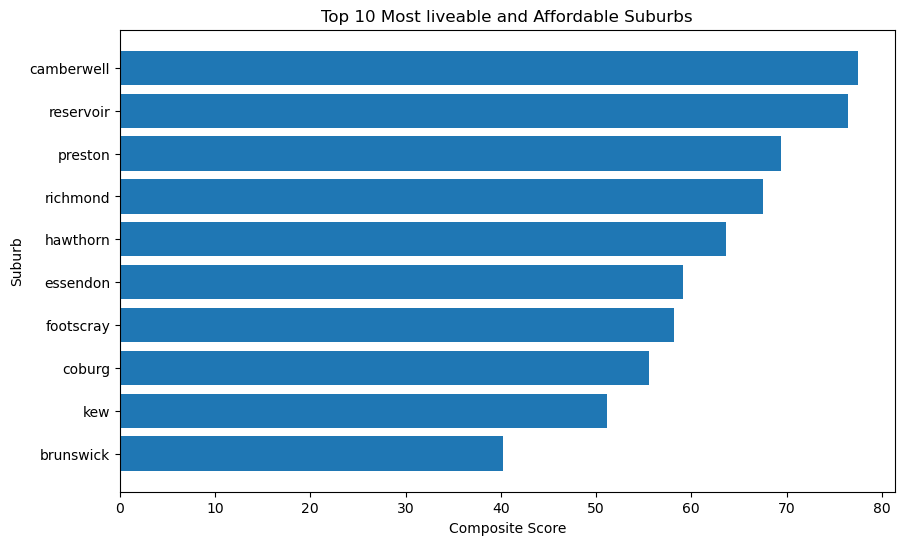

In [5]:
import matplotlib.pyplot as plt

top_10_suburbs = ranked_suburbs.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_suburbs['suburb'], top_10_suburbs['Composite_Score'])
plt.xlabel('Composite Score')
plt.ylabel('Suburb')
plt.title('Top 10 Most liveable and Affordable Suburbs')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score 
# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _bar.png')

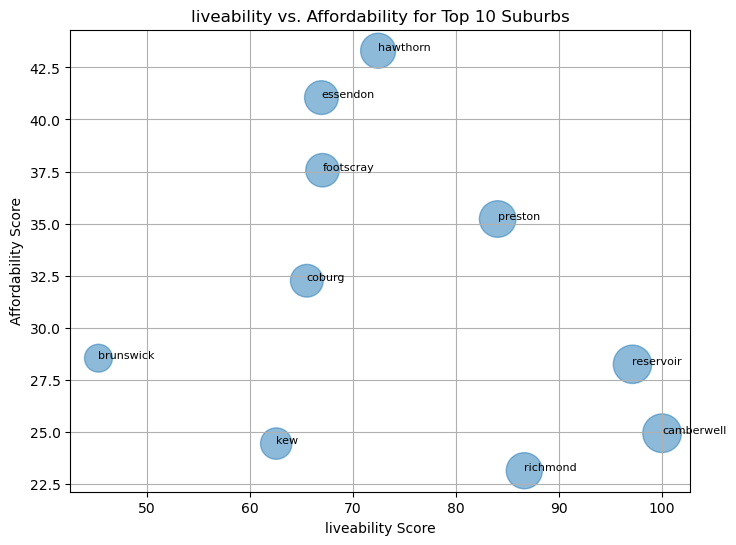

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(top_10_suburbs['liveability_Score'], 
            top_10_suburbs['affordability'], s=
            top_10_suburbs['Composite_Score'] * 10, alpha=0.5)
plt.xlabel('liveability Score')
plt.ylabel('Affordability Score')
plt.title('liveability vs. Affordability for Top 10 Suburbs')
plt.grid(True)
for i, suburb in enumerate(top_10_suburbs['suburb']):
    plt.annotate(suburb, (top_10_suburbs['liveability_Score'].iloc[i], 
                          top_10_suburbs['affordability'].iloc[i]), fontsize=8)
# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _scatter.png')

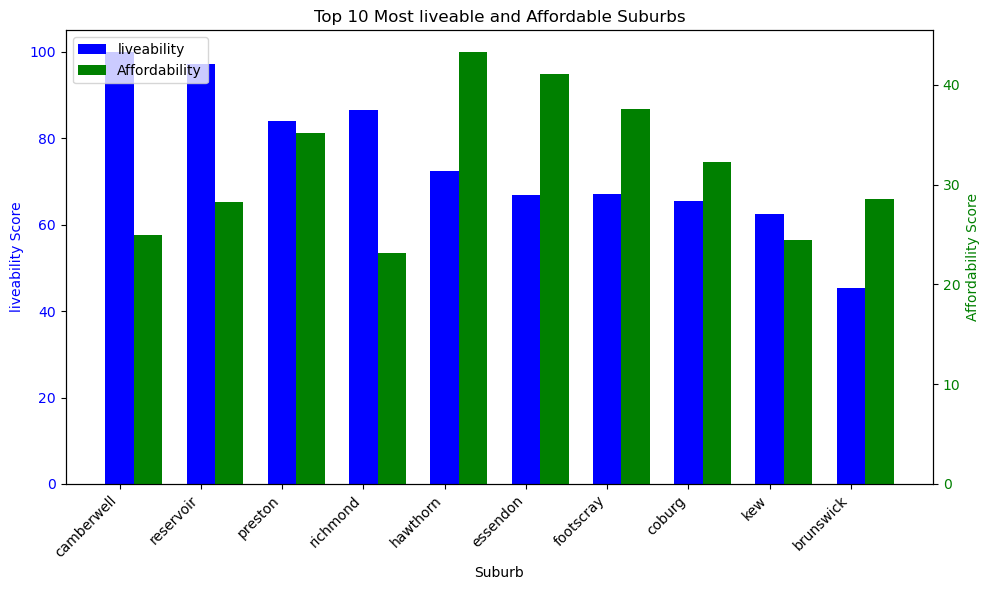

In [12]:
# Select the top 10 suburbs
top_10_suburbs = ranked_suburbs.head(10)

# Define the data
suburbs = top_10_suburbs['suburb']
liveability_scores = top_10_suburbs['liveability_Score']
affordability_scores = top_10_suburbs['affordability']

# Create an array of evenly spaced values for the x-axis
x = np.arange(len(suburbs))

# Define the width of the bars
bar_width = 0.35

# Create a figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bars for liveability scores
ax1.bar(x, liveability_scores, bar_width, label='liveability', color='b')

# Set labels and title for the liveability bars
ax1.set_xlabel('Suburb')
ax1.set_ylabel('liveability Score', color='b')
ax1.set_title('Top 10 Most liveable and Affordable Suburbs')
ax1.set_xticks(x)
ax1.set_xticklabels(suburbs, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for affordability scores
ax2 = ax1.twinx()

# Create bars for affordability scores
ax2.bar(x + bar_width, affordability_scores, bar_width, 
        label='Affordability', color='g')

# Set labels and title for the affordability bars
ax2.set_ylabel('Affordability Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _column.png')

In [15]:
# Not considering income

# Rank suburbs by median_price_per_month
affordability_ranked['median_price_per_month'] = \
    scaler.fit_transform(affordability_ranked[['median_price_per_month']])

# Sort the affordability DataFrame by 'median_price_per_month' in ascending 
ranked_affordability_suburbs = \
    affordability_ranked.sort_values(by='median_price_per_month', 
                                     ascending=True)

# Merge the liveability and affordability DataFrames based on the 'suburb' column
combined_df_2 = liveability_ranked.merge(ranked_affordability_suburbs, 
                                         on='suburb', how='inner')

# Normalize 'liveability_Score' and 'Affordability' to scale between 0 and 100
scaler = MinMaxScaler(feature_range=(0, 100))
combined_df_2[['Liveability_Score', 'median_price_per_month']] = \
    scaler.fit_transform(
        combined_df_2[['liveability_Score', 'median_price_per_month']])

# Define weights for liveability and affordability
liveability_weight = 0.5
affordability_weight = 0.5

# Calculate the composite score for each suburb
combined_df_2['Composite_Score'] = (
    (liveability_weight * combined_df_2['liveability_Score']) +
    (affordability_weight * combined_df_2['median_price_per_month'])
)

# Rank suburbs by composite score
ranked_suburbs_2 = combined_df_2.sort_values(
    by='Composite_Score', ascending=False)

# Print the top 20 suburbs based on the composite score
print(ranked_suburbs_2.head(20))

         suburb  schools_count  hospital_count  open_space_count  trams_count  \
0    camberwell       0.333333        0.071429          0.105263     1.000000   
1     reservoir       0.933333        0.071429          0.358852     0.113924   
2      richmond       0.533333        0.285714          0.138756     0.708861   
3       preston       0.866667        0.142857          0.280702     0.493671   
4      hawthorn       0.533333        0.214286          0.360447     0.658228   
8           kew       0.733333        0.428571          0.317384     0.582278   
7        coburg       0.666667        0.142857          0.263158     0.405063   
6      essendon       0.333333        0.071429          0.167464     0.291139   
5     footscray       0.400000        0.428571          0.234450     0.177215   
11    brunswick       0.266667        0.071429          0.082935     0.329114   
10    parkville       0.200000        0.500000          0.205742     0.329114   
14     armadale       0.2000

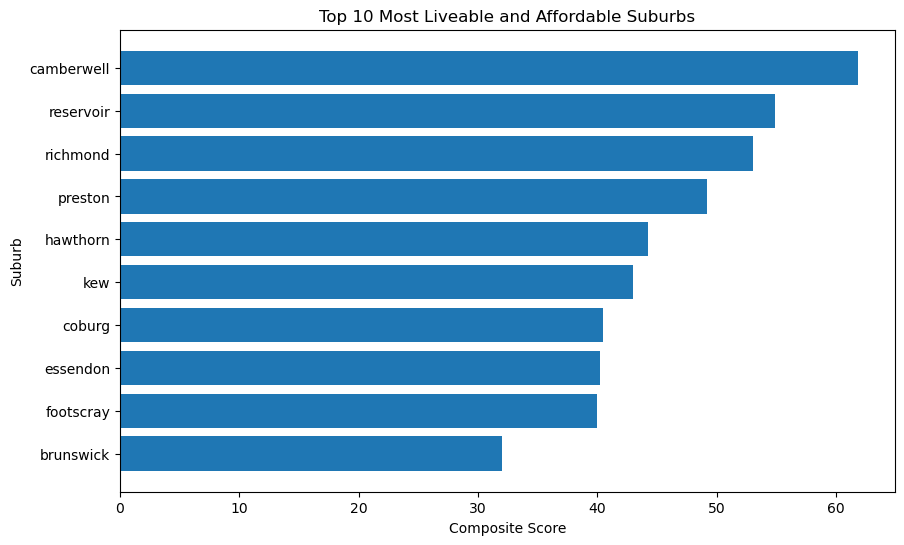

In [16]:

top_10_suburbs_2 = ranked_suburbs_2.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_suburbs_2['suburb'], top_10_suburbs_2['Composite_Score'])
plt.xlabel('Composite Score')
plt.ylabel('Suburb')
plt.title('Top 10 Most Liveable and Affordable Suburbs')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _bar.png')

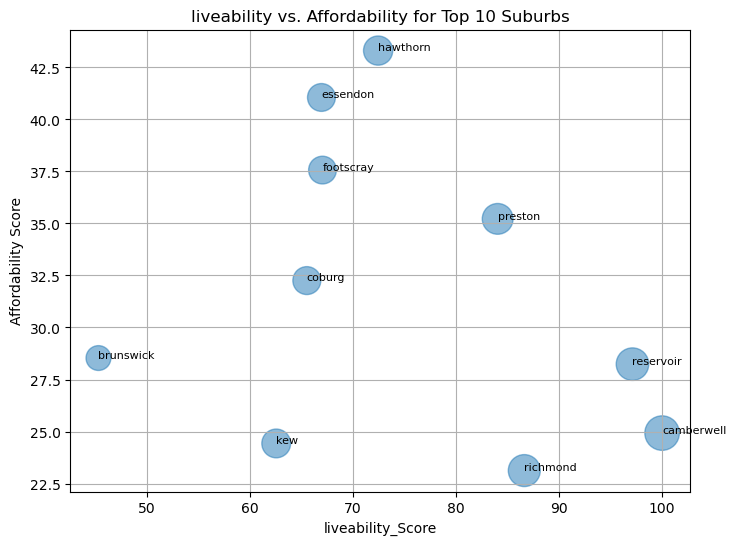

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(top_10_suburbs_2['liveability_Score'], 
            top_10_suburbs_2['affordability'], s=
            top_10_suburbs_2['Composite_Score'] * 10, alpha=0.5)
plt.xlabel('liveability_Score')
plt.ylabel('Affordability Score')
plt.title('liveability vs. Affordability for Top 10 Suburbs')
plt.grid(True)
for i, suburb in enumerate(top_10_suburbs_2['suburb']):
    plt.annotate(suburb, 
                 (top_10_suburbs_2['Liveability_Score'].iloc[i],
                   top_10_suburbs_2['affordability'].iloc[i]), fontsize=8)
# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _scatter.png')

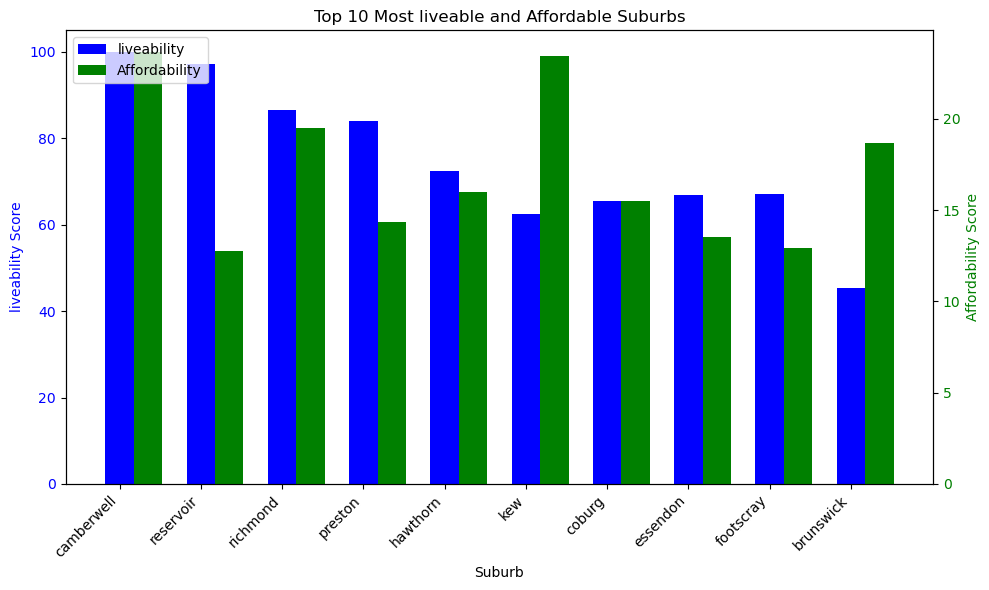

In [18]:

# Define the data
suburbs = top_10_suburbs_2['suburb']
liveability_scores = top_10_suburbs_2['liveability_Score']
affordability_scores = top_10_suburbs_2['median_price_per_month']

# Create an array of evenly spaced values for the x-axis
x = np.arange(len(suburbs))

# Define the width of the bars
bar_width = 0.35

# Create a figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bars for liveability scores
ax1.bar(x, liveability_scores, bar_width, label='liveability', color='b')

# Set labels and title for the liveability bars
ax1.set_xlabel('Suburb')
ax1.set_ylabel('liveability Score', color='b')
ax1.set_title('Top 10 Most liveable and Affordable Suburbs')
ax1.set_xticks(x)
ax1.set_xticklabels(suburbs, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for affordability scores
ax2 = ax1.twinx()

# Create bars for affordability scores
ax2.bar(x + bar_width, affordability_scores, bar_width, 
        label='Affordability', color='g')

# Set labels and title for the affordability bars
ax2.set_ylabel('Affordability Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

# Save the plot
plt.savefig(f'{PLOT_DATA_DIR}/top_10_liveable_affordable_suburbs _column.png')
